#### ML : Neural Network

พัชรพล อ่วมโอฬาร 6210422018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import floor, ceil
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [3]:
import seaborn as sns
sns.set(style="ticks")

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
def PCA_Converter(data):
    df_wine_std = StandardScaler().fit_transform(data)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(df_wine_std)
    pca_join = pd.DataFrame(data=pca_fit, columns=['PCA1','PCA2'])
    return pca_join

In [6]:
def convert_stdZ(data, headers):
    df_std = StandardScaler().fit_transform(data)
    df_ret_std = pd.DataFrame(df_std, columns=headers)
    return df_ret_std

In [7]:
def plot_value_array(prediction, ytest, i):
    t_label = ytest.iloc[i]
    plt.grid(False)
    plt.xticks(range(4))
    plt.yticks(np.arange(0, 1, step=0.2))
    thisplot = plt.bar(range(4), prediction[i], color="#777777")
    plt.ylim([0, 1]) # Probability plot 0-1
    predicted_label = np.argmax(prediction[i])
    thisplot[predicted_label].set_color('red')
    thisplot[t_label].set_color('blue')
    plt.xlabel('CLASS')
    plt.ylabel('Probability')

In [8]:
# IMPORT FROM LOCAL FILE (Downloaded form webSite)
pathStr = 'source'
filename = pathStr+'\wine.data'
col_name = ['CLASS','ALC','MLA','ASH','AOA','MAG','PHE','FLA','NFL','PRO','COL','HUE','ODW','PRL']
df_wine = pd.read_csv(filename, sep=',', lineterminator='\n', header=None, names=col_name)

In [9]:
df_wine.head(5)

,CLASS,ALC,MLA,ASH,AOA,MAG,PHE,FLA,NFL,PRO,COL,HUE,ODW,PRL
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )<br>
<ol>
    <li>ALC = Alcohol</li>
    <li>MLA = Malic acid</li>
    <li>ASH	= Ash</li>
    <li>AOA = Alcalinity of ash</li>
    <li>MAG = Magnesium</li>
    <li>PHE = Total phenols</li>
    <li>FLA = Flavanoids</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>PRO = Proanthocyanins</li>
    <li>COL = Color intensity</li>
    <li>HUE = Hue</li>
    <li>ODW = OD280/OD315 of diluted wines</li>
    <li>PRL = Proline</li>
</ol>

ทำ Correlation matrix

In [10]:
df_corr = pd.DataFrame(df_wine.corr())

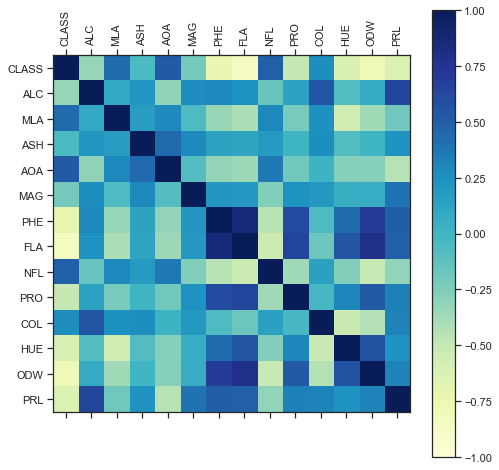

In [11]:
plt.figure(figsize=(8,8))
plt.matshow(df_corr,fignum=1)
plt.xticks(range(len(df_corr.columns)), labels=df_corr.columns, rotation='vertical')
plt.yticks(range(len(df_corr.columns)), labels=df_corr.columns)

plt.imshow(df_corr, cmap=plt.cm.get_cmap('YlGnBu', 360))
plt.colorbar()
plt.clim(-1, 1);
plt.show()

In [12]:
corr_cal = df_corr.iloc[0]

คัดเลือก Feature ที่เป็นบวกกับ CLASS

In [13]:
corr_cal

CLASS    1.000000
ALC     -0.328222
MLA      0.437776
ASH     -0.049643
AOA      0.517859
MAG     -0.209179
PHE     -0.719163
FLA     -0.847498
NFL      0.489109
PRO     -0.499130
COL      0.265668
HUE     -0.617369
ODW     -0.788230
PRL     -0.633717
Name: CLASS, dtype: float64

In [14]:
df_wine = df_wine[['CLASS','MLA','AOA','NFL','COL']]

#### Data preprocessing

In [15]:
target = df_wine['CLASS']
data = df_wine.drop('CLASS', axis=1)

In [16]:
cols = list(data.columns)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [19]:
X_Result = X_test.copy()

Standardize the data

In [20]:
X_train = convert_stdZ(X_train, cols)
X_test = convert_stdZ(X_test, cols)

#### Build model

Hyperparameter test

In [21]:
params = {
    'epochs':[10,20,50],
    'optimizer':['adam','rmsprop'],
    'kernel':['random_uniform','glorot_uniform'],
    'batch_size': [5, 10, 20]
}

In [22]:
def build_classifier(optimizer, kernel):
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer=kernel, activation='relu'))
    model.add(Dense(8, kernel_initializer=kernel, activation='relu'))
    model.add(Dense(3, kernel_initializer=kernel, activation='sigmoid'))
    model.compile(optimizer=optimizer,
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics =['accuracy'])
    return model

In [23]:
clf_model = KerasClassifier(build_classifier)

In [24]:
grid_search = GridSearchCV(estimator=clf_model, param_grid=params, n_jobs=1, cv=5)
grid_search = grid_search.fit(X_train, y_train)

Train on 113 samples
Epoch 1/10
113/113 [==============================] - 2s 15ms/sample - loss: 1.0986 - accuracy: 0.3186
Epoch 2/10
113/113 [==============================] - 0s 235us/sample - loss: 1.0983 - accuracy: 0.4071
Epoch 3/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0977 - accuracy: 0.4071
Epoch 4/10
113/113 [==============================] - 0s 276us/sample - loss: 1.0964 - accuracy: 0.4690
Epoch 5/10
113/113 [==============================] - 0s 276us/sample - loss: 1.0938 - accuracy: 0.5664
Epoch 6/10
113/113 [==============================] - 0s 196us/sample - loss: 1.0894 - accuracy: 0.5575
Epoch 7/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0824 - accuracy: 0.5310
Epoch 8/10
113/113 [==============================] - 0s 276us/sample - loss: 1.0723 - accuracy: 0.5398
Epoch 9/10
113/113 [==============================] - 0s 276us/sample - loss: 1.0599 - accuracy: 0.5752
Epoch 10/10
29/29 [=========================

114/114 [==============================] - 0s 4ms/sample - loss: 1.0985 - accuracy: 0.3596
Epoch 2/10
114/114 [==============================] - 0s 331us/sample - loss: 1.0980 - accuracy: 0.4035
Epoch 3/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0973 - accuracy: 0.4035
Epoch 4/10
114/114 [==============================] - 0s 274us/sample - loss: 1.0962 - accuracy: 0.4035
Epoch 5/10
114/114 [==============================] - 0s 274us/sample - loss: 1.0949 - accuracy: 0.4035
Epoch 6/10
114/114 [==============================] - 0s 194us/sample - loss: 1.0929 - accuracy: 0.4035
Epoch 7/10
114/114 [==============================] - 0s 274us/sample - loss: 1.0905 - accuracy: 0.4035
Epoch 8/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0877 - accuracy: 0.4474
Epoch 9/10
114/114 [==============================] - 0s 274us/sample - loss: 1.0841 - accuracy: 0.5088
Epoch 10/10
28/28 [==============================] - 0s 4ms/sample - loss: 1.

114/114 [==============================] - 0s 137us/sample - loss: 1.0978 - accuracy: 0.5000
Epoch 3/10
114/114 [==============================] - 0s 274us/sample - loss: 1.0952 - accuracy: 0.5000
Epoch 4/10
114/114 [==============================] - 0s 274us/sample - loss: 1.0918 - accuracy: 0.5614
Epoch 5/10
114/114 [==============================] - 0s 194us/sample - loss: 1.0880 - accuracy: 0.6491
Epoch 6/10
114/114 [==============================] - 0s 256us/sample - loss: 1.0831 - accuracy: 0.6579
Epoch 7/10
114/114 [==============================] - 0s 221us/sample - loss: 1.0775 - accuracy: 0.6491
Epoch 8/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0700 - accuracy: 0.6491
Epoch 9/10
114/114 [==============================] - 0s 264us/sample - loss: 1.0620 - accuracy: 0.6491
Epoch 10/10
28/28 [==============================] - 0s 4ms/sample - loss: 1.0603 - accuracy: 0.7143
Train on 113 samples
Epoch 1/10
113/113 [==============================] - 1s 

113/113 [==============================] - 0s 138us/sample - loss: 0.9824 - accuracy: 0.5841
Epoch 15/20
113/113 [==============================] - 0s 276us/sample - loss: 0.9661 - accuracy: 0.5841
Epoch 16/20
113/113 [==============================] - 0s 196us/sample - loss: 0.9524 - accuracy: 0.6018
Epoch 17/20
113/113 [==============================] - 0s 277us/sample - loss: 0.9412 - accuracy: 0.6018
Epoch 18/20
113/113 [==============================] - 0s 138us/sample - loss: 0.9300 - accuracy: 0.6018
Epoch 19/20
113/113 [==============================] - 0s 276us/sample - loss: 0.9216 - accuracy: 0.6018
Epoch 20/20
29/29 [==============================] - 0s 4ms/sample - loss: 0.8361 - accuracy: 0.6897
Train on 113 samples
Epoch 1/20
113/113 [==============================] - 0s 3ms/sample - loss: 1.0987 - accuracy: 0.3097
Epoch 2/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0983 - accuracy: 0.3982
Epoch 3/20
113/113 [==============================] - 

Epoch 8/20
114/114 [==============================] - 0s 274us/sample - loss: 1.0867 - accuracy: 0.5877
Epoch 9/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0796 - accuracy: 0.6228
Epoch 10/20
114/114 [==============================] - 0s 274us/sample - loss: 1.0698 - accuracy: 0.6316
Epoch 11/20
114/114 [==============================] - 0s 194us/sample - loss: 1.0578 - accuracy: 0.6316
Epoch 12/20
114/114 [==============================] - 0s 296us/sample - loss: 1.0436 - accuracy: 0.6316
Epoch 13/20
114/114 [==============================] - 0s 166us/sample - loss: 1.0262 - accuracy: 0.6404
Epoch 14/20
114/114 [==============================] - ETA: 0s - loss: 0.9784 - accuracy: 0.80 - 0s 137us/sample - loss: 1.0079 - accuracy: 0.6404
Epoch 15/20
114/114 [==============================] - 0s 123us/sample - loss: 0.9894 - accuracy: 0.6404
Epoch 16/20
114/114 [==============================] - 0s 274us/sample - loss: 0.9706 - accuracy: 0.6491
Epoch 17/20
114

114/114 [==============================] - 1s 8ms/sample - loss: 1.0985 - accuracy: 0.4035
Epoch 2/20
114/114 [==============================] - 0s 481us/sample - loss: 1.0980 - accuracy: 0.4123
Epoch 3/20
114/114 [==============================] - 0s 1ms/sample - loss: 1.0971 - accuracy: 0.4123
Epoch 4/20
114/114 [==============================] - 0s 593us/sample - loss: 1.0956 - accuracy: 0.4123
Epoch 5/20
114/114 [==============================] - 0s 281us/sample - loss: 1.0935 - accuracy: 0.4123
Epoch 6/20
114/114 [==============================] - 0s 497us/sample - loss: 1.0906 - accuracy: 0.4561
Epoch 7/20
114/114 [==============================] - 0s 411us/sample - loss: 1.0867 - accuracy: 0.5263
Epoch 8/20
114/114 [==============================] - 0s 350us/sample - loss: 1.0817 - accuracy: 0.5614
Epoch 9/20
114/114 [==============================] - 0s 411us/sample - loss: 1.0757 - accuracy: 0.5965
Epoch 10/20
114/114 [==============================] - 0s 420us/sample - loss: 

113/113 [==============================] - 0s 371us/sample - loss: 1.0066 - accuracy: 0.7168
Epoch 17/20
113/113 [==============================] - 0s 309us/sample - loss: 0.9948 - accuracy: 0.7434
Epoch 18/20
113/113 [==============================] - 0s 406us/sample - loss: 0.9829 - accuracy: 0.7611
Epoch 19/20
113/113 [==============================] - 0s 706us/sample - loss: 0.9698 - accuracy: 0.7788
Epoch 20/20
29/29 [==============================] - 0s 4ms/sample - loss: 0.9484 - accuracy: 0.7586
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 0s 4ms/sample - loss: 1.0830 - accuracy: 0.2632
Epoch 2/20
114/114 [==============================] - 0s 324us/sample - loss: 1.0770 - accuracy: 0.4825
Epoch 3/20
114/114 [==============================] - 0s 420us/sample - loss: 1.0708 - accuracy: 0.5526
Epoch 4/20
114/114 [==============================] - 0s 394us/sample - loss: 1.0652 - accuracy: 0.5702
Epoch 5/20
114/114 [==============================] - 0s

113/113 [==============================] - 0s 415us/sample - loss: 1.0694 - accuracy: 0.4690
Epoch 11/20
113/113 [==============================] - 0s 371us/sample - loss: 1.0636 - accuracy: 0.4690
Epoch 12/20
113/113 [==============================] - 0s 450us/sample - loss: 1.0569 - accuracy: 0.4779
Epoch 13/20
113/113 [==============================] - 0s 318us/sample - loss: 1.0495 - accuracy: 0.4690
Epoch 14/20
113/113 [==============================] - 0s 335us/sample - loss: 1.0420 - accuracy: 0.4867
Epoch 15/20
113/113 [==============================] - 0s 300us/sample - loss: 1.0340 - accuracy: 0.5044
Epoch 16/20
113/113 [==============================] - 0s 380us/sample - loss: 1.0253 - accuracy: 0.5044
Epoch 17/20
113/113 [==============================] - 0s 327us/sample - loss: 1.0167 - accuracy: 0.4956
Epoch 18/20
113/113 [==============================] - 0s 432us/sample - loss: 1.0071 - accuracy: 0.5133
Epoch 19/20
113/113 [==============================] - ETA: 0s - lo

114/114 [==============================] - 0s 411us/sample - loss: 1.1034 - accuracy: 0.2807
Epoch 4/20
114/114 [==============================] - 0s 451us/sample - loss: 1.0934 - accuracy: 0.3246
Epoch 5/20
114/114 [==============================] - 0s 455us/sample - loss: 1.0836 - accuracy: 0.4035
Epoch 6/20
114/114 [==============================] - 0s 455us/sample - loss: 1.0741 - accuracy: 0.4211
Epoch 7/20
114/114 [==============================] - 0s 344us/sample - loss: 1.0648 - accuracy: 0.4561
Epoch 8/20
114/114 [==============================] - 0s 420us/sample - loss: 1.0559 - accuracy: 0.4737
Epoch 9/20
114/114 [==============================] - 0s 341us/sample - loss: 1.0477 - accuracy: 0.4912
Epoch 10/20
114/114 [==============================] - 0s 394us/sample - loss: 1.0398 - accuracy: 0.4912
Epoch 11/20
114/114 [==============================] - 0s 429us/sample - loss: 1.0322 - accuracy: 0.4912
Epoch 12/20
114/114 [==============================] - 0s 402us/sample - 

113/113 [==============================] - 0s 406us/sample - loss: 1.0833 - accuracy: 0.4159
Epoch 9/50
113/113 [==============================] - 0s 327us/sample - loss: 1.0748 - accuracy: 0.4602
Epoch 10/50
113/113 [==============================] - 0s 371us/sample - loss: 1.0629 - accuracy: 0.5044
Epoch 11/50
113/113 [==============================] - 0s 371us/sample - loss: 1.0489 - accuracy: 0.4956
Epoch 12/50
113/113 [==============================] - 0s 432us/sample - loss: 1.0317 - accuracy: 0.5133
Epoch 13/50
113/113 [==============================] - 0s 300us/sample - loss: 1.0146 - accuracy: 0.5221
Epoch 14/50
113/113 [==============================] - 0s 318us/sample - loss: 0.9983 - accuracy: 0.5310
Epoch 15/50
113/113 [==============================] - 0s 503us/sample - loss: 0.9814 - accuracy: 0.5487
Epoch 16/50
113/113 [==============================] - ETA: 0s - loss: 0.9806 - accuracy: 0.52 - 0s 759us/sample - loss: 0.9670 - accuracy: 0.5575
Epoch 17/50
113/113 [=====

114/114 [==============================] - 0s 137us/sample - loss: 0.8258 - accuracy: 0.6667
Epoch 35/50
114/114 [==============================] - 0s 274us/sample - loss: 0.8234 - accuracy: 0.6754
Epoch 36/50
114/114 [==============================] - 0s 274us/sample - loss: 0.8207 - accuracy: 0.7281
Epoch 37/50
114/114 [==============================] - 0s 274us/sample - loss: 0.8181 - accuracy: 0.7544
Epoch 38/50
114/114 [==============================] - 0s 359us/sample - loss: 0.8158 - accuracy: 0.7544
Epoch 39/50
114/114 [==============================] - 0s 793us/sample - loss: 0.8133 - accuracy: 0.7544
Epoch 40/50
114/114 [==============================] - 0s 1ms/sample - loss: 0.8110 - accuracy: 0.7544
Epoch 41/50
114/114 [==============================] - 0s 245us/sample - loss: 0.8089 - accuracy: 0.7544
Epoch 42/50
114/114 [==============================] - 0s 236us/sample - loss: 0.8068 - accuracy: 0.7544
Epoch 43/50
114/114 [==============================] - 0s 238us/sampl

114/114 [==============================] - 0s 236us/sample - loss: 1.0415 - accuracy: 0.6228
Epoch 11/50
114/114 [==============================] - 0s 219us/sample - loss: 1.0211 - accuracy: 0.6404
Epoch 12/50
114/114 [==============================] - 0s 227us/sample - loss: 1.0005 - accuracy: 0.6228
Epoch 13/50
114/114 [==============================] - 0s 236us/sample - loss: 0.9791 - accuracy: 0.6228
Epoch 14/50
114/114 [==============================] - 0s 236us/sample - loss: 0.9587 - accuracy: 0.6316
Epoch 15/50
114/114 [==============================] - 0s 254us/sample - loss: 0.9414 - accuracy: 0.6316
Epoch 16/50
114/114 [==============================] - 0s 136us/sample - loss: 0.9260 - accuracy: 0.6316
Epoch 17/50
114/114 [==============================] - 0s 300us/sample - loss: 0.9128 - accuracy: 0.6404
Epoch 18/50
114/114 [==============================] - 0s 161us/sample - loss: 0.9024 - accuracy: 0.6404
Epoch 19/50
114/114 [==============================] - 0s 274us/sam

113/113 [==============================] - 0s 247us/sample - loss: 0.9613 - accuracy: 0.7699
Epoch 37/50
113/113 [==============================] - 0s 219us/sample - loss: 0.9554 - accuracy: 0.7788
Epoch 38/50
113/113 [==============================] - 0s 271us/sample - loss: 0.9498 - accuracy: 0.8053
Epoch 39/50
113/113 [==============================] - 0s 238us/sample - loss: 0.9442 - accuracy: 0.8142
Epoch 40/50
113/113 [==============================] - 0s 256us/sample - loss: 0.9385 - accuracy: 0.8053
Epoch 41/50
113/113 [==============================] - 0s 247us/sample - loss: 0.9324 - accuracy: 0.8053
Epoch 42/50
113/113 [==============================] - 0s 238us/sample - loss: 0.9264 - accuracy: 0.8230
Epoch 43/50
113/113 [==============================] - 0s 238us/sample - loss: 0.9207 - accuracy: 0.8142
Epoch 44/50
113/113 [==============================] - 0s 247us/sample - loss: 0.9149 - accuracy: 0.8230
Epoch 45/50
113/113 [==============================] - 0s 229us/sam

114/114 [==============================] - 0s 403us/sample - loss: 1.0575 - accuracy: 0.5702
Epoch 13/50
114/114 [==============================] - 0s 411us/sample - loss: 1.0487 - accuracy: 0.5614
Epoch 14/50
114/114 [==============================] - 0s 306us/sample - loss: 1.0385 - accuracy: 0.5789
Epoch 15/50
114/114 [==============================] - 0s 542us/sample - loss: 1.0278 - accuracy: 0.5789
Epoch 16/50
114/114 [==============================] - 0s 490us/sample - loss: 1.0167 - accuracy: 0.5877
Epoch 17/50
114/114 [==============================] - 0s 345us/sample - loss: 1.0053 - accuracy: 0.5789
Epoch 18/50
114/114 [==============================] - 0s 365us/sample - loss: 0.9933 - accuracy: 0.5614
Epoch 19/50
114/114 [==============================] - 0s 403us/sample - loss: 0.9816 - accuracy: 0.5789
Epoch 20/50
114/114 [==============================] - 0s 403us/sample - loss: 0.9705 - accuracy: 0.5789
Epoch 21/50
114/114 [==============================] - 0s 341us/sam

114/114 [==============================] - 0s 245us/sample - loss: 0.8509 - accuracy: 0.6316
Epoch 39/50
114/114 [==============================] - 0s 612us/sample - loss: 0.8470 - accuracy: 0.6404
Epoch 40/50
114/114 [==============================] - 0s 429us/sample - loss: 0.8433 - accuracy: 0.6404
Epoch 41/50
114/114 [==============================] - 0s 543us/sample - loss: 0.8398 - accuracy: 0.6404
Epoch 42/50
114/114 [==============================] - 0s 446us/sample - loss: 0.8364 - accuracy: 0.6491
Epoch 43/50
114/114 [==============================] - 0s 438us/sample - loss: 0.8332 - accuracy: 0.6491
Epoch 44/50
114/114 [==============================] - 0s 429us/sample - loss: 0.8300 - accuracy: 0.6491
Epoch 45/50
114/114 [==============================] - 0s 406us/sample - loss: 0.8268 - accuracy: 0.6491
Epoch 46/50
114/114 [==============================] - 0s 420us/sample - loss: 0.8235 - accuracy: 0.6491
Epoch 47/50
114/114 [==============================] - 0s 455us/sam

113/113 [==============================] - 0s 971us/sample - loss: 0.9040 - accuracy: 0.7434
Epoch 14/50
113/113 [==============================] - 0s 1ms/sample - loss: 0.8938 - accuracy: 0.7522
Epoch 15/50
113/113 [==============================] - 0s 1ms/sample - loss: 0.8841 - accuracy: 0.7522
Epoch 16/50
113/113 [==============================] - 0s 1ms/sample - loss: 0.8751 - accuracy: 0.7522
Epoch 17/50
113/113 [==============================] - 0s 600us/sample - loss: 0.8671 - accuracy: 0.7522
Epoch 18/50
113/113 [==============================] - 0s 397us/sample - loss: 0.8590 - accuracy: 0.7522
Epoch 19/50
113/113 [==============================] - 0s 680us/sample - loss: 0.8511 - accuracy: 0.7611
Epoch 20/50
113/113 [==============================] - 0s 503us/sample - loss: 0.8435 - accuracy: 0.7522
Epoch 21/50
113/113 [==============================] - 0s 335us/sample - loss: 0.8361 - accuracy: 0.7699
Epoch 22/50
113/113 [==============================] - 0s 388us/sample - 

113/113 [==============================] - 0s 82us/sample - loss: 0.7296 - accuracy: 0.8761
Epoch 41/50
113/113 [==============================] - 0s 213us/sample - loss: 0.7253 - accuracy: 0.8761
Epoch 42/50
113/113 [==============================] - 0s 138us/sample - loss: 0.7212 - accuracy: 0.8761
Epoch 43/50
113/113 [==============================] - 0s 312us/sample - loss: 0.7178 - accuracy: 0.8761
Epoch 44/50
113/113 [==============================] - 0s 277us/sample - loss: 0.7143 - accuracy: 0.8761
Epoch 45/50
113/113 [==============================] - 0s 138us/sample - loss: 0.7102 - accuracy: 0.8761
Epoch 46/50
113/113 [==============================] - 0s 276us/sample - loss: 0.7073 - accuracy: 0.8761
Epoch 47/50
113/113 [==============================] - 0s 334us/sample - loss: 0.7042 - accuracy: 0.8761
Epoch 48/50
113/113 [==============================] - 0s 276us/sample - loss: 0.7013 - accuracy: 0.8761
Epoch 49/50
113/113 [==============================] - 0s 276us/samp

114/114 [==============================] - 0s 411us/sample - loss: 0.9555 - accuracy: 0.5088
Epoch 17/50
114/114 [==============================] - 0s 194us/sample - loss: 0.9511 - accuracy: 0.5088
Epoch 18/50
114/114 [==============================] - 0s 274us/sample - loss: 0.9464 - accuracy: 0.5088
Epoch 19/50
114/114 [==============================] - 0s 274us/sample - loss: 0.9420 - accuracy: 0.5263
Epoch 20/50
114/114 [==============================] - 0s 468us/sample - loss: 0.9378 - accuracy: 0.5175
Epoch 21/50
114/114 [==============================] - 0s 691us/sample - loss: 0.9333 - accuracy: 0.5351
Epoch 22/50
114/114 [==============================] - 0s 319us/sample - loss: 0.9292 - accuracy: 0.5351
Epoch 23/50
114/114 [==============================] - 0s 411us/sample - loss: 0.9246 - accuracy: 0.5614
Epoch 24/50
114/114 [==============================] - 0s 318us/sample - loss: 0.9207 - accuracy: 0.5702
Epoch 25/50
114/114 [==============================] - 0s 274us/sam

114/114 [==============================] - 0s 685us/sample - loss: 0.7939 - accuracy: 0.7807
Epoch 44/50
114/114 [==============================] - 0s 274us/sample - loss: 0.7877 - accuracy: 0.7895
Epoch 45/50
114/114 [==============================] - 0s 251us/sample - loss: 0.7823 - accuracy: 0.7895
Epoch 46/50
114/114 [==============================] - 0s 411us/sample - loss: 0.7775 - accuracy: 0.7895
Epoch 47/50
114/114 [==============================] - 0s 274us/sample - loss: 0.7727 - accuracy: 0.7895
Epoch 48/50
114/114 [==============================] - 0s 331us/sample - loss: 0.7686 - accuracy: 0.7895
Epoch 49/50
114/114 [==============================] - 0s 274us/sample - loss: 0.7645 - accuracy: 0.8070
Epoch 50/50
28/28 [==============================] - 0s 5ms/sample - loss: 0.7031 - accuracy: 0.8929
Train on 113 samples
Epoch 1/50
113/113 [==============================] - 1s 8ms/sample - loss: 1.0936 - accuracy: 0.5575
Epoch 2/50
113/113 [==============================] -

113/113 [==============================] - 0s 138us/sample - loss: 0.9489 - accuracy: 0.6903
Epoch 20/50
113/113 [==============================] - 0s 196us/sample - loss: 0.9409 - accuracy: 0.7080
Epoch 21/50
113/113 [==============================] - 0s 276us/sample - loss: 0.9321 - accuracy: 0.7168
Epoch 22/50
113/113 [==============================] - 0s 415us/sample - loss: 0.9240 - accuracy: 0.7257
Epoch 23/50
113/113 [==============================] - 0s 277us/sample - loss: 0.9162 - accuracy: 0.7522
Epoch 24/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9083 - accuracy: 0.7611
Epoch 25/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9009 - accuracy: 0.7522
Epoch 26/50
113/113 [==============================] - 0s 334us/sample - loss: 0.8926 - accuracy: 0.7611
Epoch 27/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8847 - accuracy: 0.7876
Epoch 28/50
113/113 [==============================] - 0s 276us/sam

114/114 [==============================] - 0s 236us/sample - loss: 0.7443 - accuracy: 0.8246
Epoch 47/50
114/114 [==============================] - 0s 245us/sample - loss: 0.7409 - accuracy: 0.8421
Epoch 48/50
114/114 [==============================] - 0s 245us/sample - loss: 0.7381 - accuracy: 0.8421
Epoch 49/50
114/114 [==============================] - 0s 123us/sample - loss: 0.7352 - accuracy: 0.8421
Epoch 50/50
28/28 [==============================] - 0s 4ms/sample - loss: 0.7858 - accuracy: 0.7857
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 1s 4ms/sample - loss: 1.0880 - accuracy: 0.4211
Epoch 2/50
114/114 [==============================] - 0s 194us/sample - loss: 1.0750 - accuracy: 0.4649
Epoch 3/50
114/114 [==============================] - 0s 274us/sample - loss: 1.0633 - accuracy: 0.4912
Epoch 4/50
114/114 [==============================] - 0s 274us/sample - loss: 1.0532 - accuracy: 0.5000
Epoch 5/50
114/114 [==============================] - 0s

114/114 [==============================] - 0s 137us/sample - loss: 1.0006 - accuracy: 0.5789
Epoch 23/50
114/114 [==============================] - 0s 274us/sample - loss: 0.9939 - accuracy: 0.5789
Epoch 24/50
114/114 [==============================] - 0s 274us/sample - loss: 0.9868 - accuracy: 0.5789
Epoch 25/50
114/114 [==============================] - 0s 194us/sample - loss: 0.9797 - accuracy: 0.5965
Epoch 26/50
114/114 [==============================] - 0s 274us/sample - loss: 0.9727 - accuracy: 0.6053
Epoch 27/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9660 - accuracy: 0.6140
Epoch 28/50
114/114 [==============================] - 0s 331us/sample - loss: 0.9591 - accuracy: 0.6579
Epoch 29/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9522 - accuracy: 0.6316
Epoch 30/50
114/114 [==============================] - 0s 297us/sample - loss: 0.9454 - accuracy: 0.6667
Epoch 31/50
114/114 [==============================] - 0s 137us/sam

114/114 [==============================] - 0s 137us/sample - loss: 1.0979 - accuracy: 0.3947
Epoch 6/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0976 - accuracy: 0.3947
Epoch 7/10
114/114 [==============================] - 0s 199us/sample - loss: 1.0972 - accuracy: 0.3947
Epoch 8/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0966 - accuracy: 0.3947
Epoch 9/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0959 - accuracy: 0.3947
Epoch 10/10
28/28 [==============================] - 0s 4ms/sample - loss: 1.0928 - accuracy: 0.4286
Train on 113 samples
Epoch 1/10
113/113 [==============================] - 1s 6ms/sample - loss: 1.0984 - accuracy: 0.4248
Epoch 2/10
113/113 [==============================] - 0s 36us/sample - loss: 1.0979 - accuracy: 0.3982
Epoch 3/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0974 - accuracy: 0.3982
Epoch 4/10
113/113 [==============================] - 0s 138

113/113 [==============================] - 0s 138us/sample - loss: 1.1020 - accuracy: 0.2920
Epoch 7/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0982 - accuracy: 0.3363
Epoch 8/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0947 - accuracy: 0.3628
Epoch 9/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0910 - accuracy: 0.3805
Epoch 10/10
29/29 [==============================] - 0s 3ms/sample - loss: 1.1030 - accuracy: 0.3448
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 0s 3ms/sample - loss: 1.1057 - accuracy: 0.2807
Epoch 2/10
114/114 [==============================] - 0s 137us/sample - loss: 1.1004 - accuracy: 0.2895
Epoch 3/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0953 - accuracy: 0.2982
Epoch 4/10
114/114 [==============================] - 0s 146us/sample - loss: 1.0911 - accuracy: 0.3070
Epoch 5/10
114/114 [==============================] - 0s 16

114/114 [==============================] - 0s 137us/sample - loss: 1.0927 - accuracy: 0.4474
Epoch 8/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0903 - accuracy: 0.4649
Epoch 9/10
114/114 [==============================] - 0s 194us/sample - loss: 1.0877 - accuracy: 0.4912
Epoch 10/10
28/28 [==============================] - 0s 4ms/sample - loss: 1.0825 - accuracy: 0.4643
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 0s 4ms/sample - loss: 1.0727 - accuracy: 0.3684
Epoch 2/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0640 - accuracy: 0.3772
Epoch 3/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0568 - accuracy: 0.3947
Epoch 4/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0499 - accuracy: 0.4035
Epoch 5/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0436 - accuracy: 0.4123
Epoch 6/10
114/114 [==============================] - 0s 23

28/28 [==============================] - 0s 4ms/sample - loss: 1.0099 - accuracy: 0.6071
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 0s 3ms/sample - loss: 1.0986 - accuracy: 0.3246
Epoch 2/20
114/114 [==============================] - 0s 155us/sample - loss: 1.0984 - accuracy: 0.4298
Epoch 3/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0980 - accuracy: 0.4123
Epoch 4/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0975 - accuracy: 0.4123
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0967 - accuracy: 0.4123
Epoch 6/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0956 - accuracy: 0.4123
Epoch 7/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0939 - accuracy: 0.4123
Epoch 8/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0916 - accuracy: 0.4123
Epoch 9/20
114/114 [==============================] - 0s 57u

113/113 [==============================] - 0s 138us/sample - loss: 1.0817 - accuracy: 0.6372
Epoch 16/20
113/113 [==============================] - 0s 196us/sample - loss: 1.0790 - accuracy: 0.6372
Epoch 17/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0758 - accuracy: 0.6283
Epoch 18/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0722 - accuracy: 0.6283
Epoch 19/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0684 - accuracy: 0.6195
Epoch 20/20
29/29 [==============================] - 0s 10ms/sample - loss: 1.0809 - accuracy: 0.4828
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 0s 4ms/sample - loss: 1.0986 - accuracy: 0.3684
Epoch 2/20
114/114 [==============================] - 0s 29us/sample - loss: 1.0983 - accuracy: 0.4035
Epoch 3/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0980 - accuracy: 0.4035
Epoch 4/20
114/114 [==============================] - 0

113/113 [==============================] - 0s 138us/sample - loss: 1.0465 - accuracy: 0.4513
Epoch 10/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0420 - accuracy: 0.4513
Epoch 11/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0384 - accuracy: 0.4513
Epoch 12/20
113/113 [==============================] - 0s 196us/sample - loss: 1.0338 - accuracy: 0.4513
Epoch 13/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0300 - accuracy: 0.4690
Epoch 14/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0261 - accuracy: 0.4690
Epoch 15/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0223 - accuracy: 0.4690
Epoch 16/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0182 - accuracy: 0.4690
Epoch 17/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0141 - accuracy: 0.4779
Epoch 18/20
113/113 [==============================] - 0s 138us/sam

114/114 [==============================] - 0s 137us/sample - loss: 1.1092 - accuracy: 0.2632
Epoch 4/20
114/114 [==============================] - 0s 57us/sample - loss: 1.1058 - accuracy: 0.2895
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.1033 - accuracy: 0.2982
Epoch 6/20
114/114 [==============================] - 0s 137us/sample - loss: 1.1004 - accuracy: 0.3421
Epoch 7/20
114/114 [==============================] - 0s 216us/sample - loss: 1.0976 - accuracy: 0.3860
Epoch 8/20
114/114 [==============================] - 0s 38us/sample - loss: 1.0945 - accuracy: 0.3947
Epoch 9/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0911 - accuracy: 0.3947
Epoch 10/20
114/114 [==============================] - 0s 203us/sample - loss: 1.0874 - accuracy: 0.3947
Epoch 11/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0836 - accuracy: 0.4035
Epoch 12/20
114/114 [==============================] - 0s 137us/sample - lo

114/114 [==============================] - 0s 57us/sample - loss: 1.0547 - accuracy: 0.7193
Epoch 19/20
114/114 [==============================] - 0s 274us/sample - loss: 1.0506 - accuracy: 0.7193
Epoch 20/20
28/28 [==============================] - 0s 4ms/sample - loss: 1.0674 - accuracy: 0.6786
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 0s 4ms/sample - loss: 1.0961 - accuracy: 0.5000
Epoch 2/20
114/114 [==============================] - 0s 32us/sample - loss: 1.0888 - accuracy: 0.5263
Epoch 3/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0831 - accuracy: 0.5351
Epoch 4/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0776 - accuracy: 0.5702
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0723 - accuracy: 0.5702
Epoch 6/20
114/114 [==============================] - 0s 123us/sample - loss: 1.0669 - accuracy: 0.6228
Epoch 7/20
114/114 [==============================] - 0s 137

113/113 [==============================] - 0s 196us/sample - loss: 0.8889 - accuracy: 0.7611
Epoch 34/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8816 - accuracy: 0.7611
Epoch 35/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8748 - accuracy: 0.7699
Epoch 36/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8681 - accuracy: 0.7699
Epoch 37/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8618 - accuracy: 0.7788
Epoch 38/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8562 - accuracy: 0.7876
Epoch 39/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8501 - accuracy: 0.7876
Epoch 40/50
113/113 [==============================] - 0s 58us/sample - loss: 0.8447 - accuracy: 0.7876
Epoch 41/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8392 - accuracy: 0.7965
Epoch 42/50
113/113 [==============================] - 0s 221us/samp

114/114 [==============================] - 0s 194us/sample - loss: 1.0913 - accuracy: 0.5789
Epoch 10/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0884 - accuracy: 0.5789
Epoch 11/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0845 - accuracy: 0.5877
Epoch 12/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0797 - accuracy: 0.5965
Epoch 13/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0738 - accuracy: 0.6053
Epoch 14/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0670 - accuracy: 0.5965
Epoch 15/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0591 - accuracy: 0.5877
Epoch 16/50
114/114 [==============================] - 0s 57us/sample - loss: 1.0499 - accuracy: 0.5789
Epoch 17/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0402 - accuracy: 0.5965
Epoch 18/50
114/114 [==============================] - 0s 137us/samp

114/114 [==============================] - 0s 137us/sample - loss: 0.9648 - accuracy: 0.6140
Epoch 37/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9633 - accuracy: 0.6140
Epoch 38/50
114/114 [==============================] - 0s 57us/sample - loss: 0.9620 - accuracy: 0.6140
Epoch 39/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9607 - accuracy: 0.6140
Epoch 40/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9594 - accuracy: 0.6140
Epoch 41/50
114/114 [==============================] - 0s 153us/sample - loss: 0.9581 - accuracy: 0.6140
Epoch 42/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9569 - accuracy: 0.6140
Epoch 43/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9557 - accuracy: 0.6053
Epoch 44/50
114/114 [==============================] - 0s 177us/sample - loss: 0.9546 - accuracy: 0.6053
Epoch 45/50
114/114 [==============================] - 0s 137us/samp

113/113 [==============================] - 0s 196us/sample - loss: 1.0869 - accuracy: 0.3982
Epoch 13/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0843 - accuracy: 0.3982
Epoch 14/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0813 - accuracy: 0.3982
Epoch 15/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0783 - accuracy: 0.3982
Epoch 16/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0750 - accuracy: 0.3982
Epoch 17/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0715 - accuracy: 0.3982
Epoch 18/50
113/113 [==============================] - 0s 196us/sample - loss: 1.0678 - accuracy: 0.4159
Epoch 19/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0637 - accuracy: 0.4248
Epoch 20/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0591 - accuracy: 0.4513
Epoch 21/50
113/113 [==============================] - 0s 138us/sam

113/113 [==============================] - 0s 138us/sample - loss: 0.9401 - accuracy: 0.6195
Epoch 39/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9347 - accuracy: 0.6195
Epoch 40/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9293 - accuracy: 0.6195
Epoch 41/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9243 - accuracy: 0.6195
Epoch 42/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9195 - accuracy: 0.6195
Epoch 43/50
113/113 [==============================] - 0s 196us/sample - loss: 0.9146 - accuracy: 0.6195
Epoch 44/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9099 - accuracy: 0.6283
Epoch 45/50
113/113 [==============================] - 0s 206us/sample - loss: 0.9052 - accuracy: 0.6283
Epoch 46/50
113/113 [==============================] - 0s 0s/sample - loss: 0.9007 - accuracy: 0.6283
Epoch 47/50
113/113 [==============================] - 0s 138us/sample

114/114 [==============================] - 0s 137us/sample - loss: 1.0773 - accuracy: 0.4123
Epoch 15/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0737 - accuracy: 0.4123
Epoch 16/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0699 - accuracy: 0.4123
Epoch 17/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0654 - accuracy: 0.4123
Epoch 18/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0608 - accuracy: 0.4123
Epoch 19/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0560 - accuracy: 0.4123
Epoch 20/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0511 - accuracy: 0.4123
Epoch 21/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0456 - accuracy: 0.4123
Epoch 22/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0400 - accuracy: 0.4123
Epoch 23/50
114/114 [==============================] - 0s 137us/sam

114/114 [==============================] - 0s 137us/sample - loss: 0.9717 - accuracy: 0.6140
Epoch 42/50
114/114 [==============================] - 0s 57us/sample - loss: 0.9675 - accuracy: 0.6140
Epoch 43/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9634 - accuracy: 0.6140
Epoch 44/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9597 - accuracy: 0.6140
Epoch 45/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9561 - accuracy: 0.6140
Epoch 46/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9526 - accuracy: 0.6140
Epoch 47/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9491 - accuracy: 0.6228
Epoch 48/50
114/114 [==============================] - 0s 57us/sample - loss: 0.9453 - accuracy: 0.6228
Epoch 49/50
114/114 [==============================] - 0s 0s/sample - loss: 0.9418 - accuracy: 0.6228
Epoch 50/50
28/28 [==============================] - 0s 4ms/sample - los

113/113 [==============================] - 0s 138us/sample - loss: 1.0313 - accuracy: 0.5841
Epoch 18/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0265 - accuracy: 0.5929
Epoch 19/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0214 - accuracy: 0.6018
Epoch 20/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0160 - accuracy: 0.6106
Epoch 21/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0103 - accuracy: 0.6283
Epoch 22/50
113/113 [==============================] - 0s 58us/sample - loss: 1.0041 - accuracy: 0.6283
Epoch 23/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9973 - accuracy: 0.6283
Epoch 24/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9897 - accuracy: 0.6372
Epoch 25/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9818 - accuracy: 0.6372
Epoch 26/50
113/113 [==============================] - 0s 138us/samp

114/114 [==============================] - 0s 137us/sample - loss: 0.8863 - accuracy: 0.5789
Epoch 45/50
114/114 [==============================] - 0s 136us/sample - loss: 0.8830 - accuracy: 0.5789
Epoch 46/50
114/114 [==============================] - 0s 165us/sample - loss: 0.8796 - accuracy: 0.5789
Epoch 47/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8766 - accuracy: 0.5789
Epoch 48/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8733 - accuracy: 0.5789
Epoch 49/50
114/114 [==============================] - 0s 158us/sample - loss: 0.8701 - accuracy: 0.5789
Epoch 50/50
28/28 [==============================] - 0s 4ms/sample - loss: 0.9208 - accuracy: 0.5000
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 0s 3ms/sample - loss: 1.0719 - accuracy: 0.5000
Epoch 2/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0638 - accuracy: 0.5000
Epoch 3/50
114/114 [==============================] - 

114/114 [==============================] - 0s 137us/sample - loss: 0.9862 - accuracy: 0.4649
Epoch 21/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9820 - accuracy: 0.4649
Epoch 22/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9778 - accuracy: 0.4649
Epoch 23/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9738 - accuracy: 0.4649
Epoch 24/50
114/114 [==============================] - 0s 162us/sample - loss: 0.9698 - accuracy: 0.4737
Epoch 25/50
114/114 [==============================] - 0s 40us/sample - loss: 0.9660 - accuracy: 0.4737
Epoch 26/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9622 - accuracy: 0.5526
Epoch 27/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9584 - accuracy: 0.5789
Epoch 28/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9547 - accuracy: 0.5877
Epoch 29/50
114/114 [==============================] - 0s 137us/samp

113/113 [==============================] - 0s 111us/sample - loss: 0.8243 - accuracy: 0.8230
Epoch 48/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8194 - accuracy: 0.8319
Epoch 49/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8148 - accuracy: 0.8319
Epoch 50/50
29/29 [==============================] - 0s 4ms/sample - loss: 0.8058 - accuracy: 0.7931
Train on 113 samples
Epoch 1/50
113/113 [==============================] - 0s 4ms/sample - loss: 1.0886 - accuracy: 0.3717
Epoch 2/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0807 - accuracy: 0.4071
Epoch 3/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0739 - accuracy: 0.4336
Epoch 4/50
113/113 [==============================] - 0s 58us/sample - loss: 1.0675 - accuracy: 0.4779
Epoch 5/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0613 - accuracy: 0.5044
Epoch 6/50
113/113 [==============================] - 0s 1

114/114 [==============================] - 0s 167us/sample - loss: 1.0235 - accuracy: 0.6140
Epoch 24/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0191 - accuracy: 0.6140
Epoch 25/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0147 - accuracy: 0.6140
Epoch 26/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0105 - accuracy: 0.6754
Epoch 27/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0060 - accuracy: 0.7018
Epoch 28/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0016 - accuracy: 0.6930
Epoch 29/50
114/114 [==============================] - 0s 172us/sample - loss: 0.9972 - accuracy: 0.7105
Epoch 30/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9929 - accuracy: 0.7193
Epoch 31/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9881 - accuracy: 0.7281
Epoch 32/50
114/114 [==============================] - 0s 137us/sam

28/28 [==============================] - 0s 4ms/sample - loss: 0.8653 - accuracy: 0.6071
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 0s 4ms/sample - loss: 1.1014 - accuracy: 0.2544
Epoch 2/50
114/114 [==============================] - 0s 28us/sample - loss: 1.0984 - accuracy: 0.3070
Epoch 3/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0959 - accuracy: 0.3333
Epoch 4/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0933 - accuracy: 0.3596
Epoch 5/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0909 - accuracy: 0.4123
Epoch 6/50
114/114 [==============================] - 0s 260us/sample - loss: 1.0884 - accuracy: 0.4035
Epoch 7/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0860 - accuracy: 0.4035
Epoch 8/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0833 - accuracy: 0.3947
Epoch 9/50
114/114 [==============================] - 0s 137u

114/114 [==============================] - 0s 0s/sample - loss: 1.0982 - accuracy: 0.4035
Epoch 5/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0980 - accuracy: 0.4035
Epoch 6/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0978 - accuracy: 0.4035
Epoch 7/10
114/114 [==============================] - 0s 0s/sample - loss: 1.0975 - accuracy: 0.4035
Epoch 8/10
114/114 [==============================] - 0s 132us/sample - loss: 1.0973 - accuracy: 0.4035
Epoch 9/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0969 - accuracy: 0.4035
Epoch 10/10
28/28 [==============================] - 0s 4ms/sample - loss: 1.0966 - accuracy: 0.3929
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 0s 3ms/sample - loss: 1.0986 - accuracy: 0.3070
Epoch 2/10
114/114 [==============================] - 0s 194us/sample - loss: 1.0984 - accuracy: 0.4123
Epoch 3/10
114/114 [==============================] - 0s 0s/sampl

114/114 [==============================] - 0s 0s/sample - loss: 1.0976 - accuracy: 0.3947
Epoch 7/10
114/114 [==============================] - 0s 0s/sample - loss: 1.0973 - accuracy: 0.3947
Epoch 8/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0970 - accuracy: 0.3947
Epoch 9/10
114/114 [==============================] - 0s 0s/sample - loss: 1.0967 - accuracy: 0.3947
Epoch 10/10
28/28 [==============================] - 0s 4ms/sample - loss: 1.0953 - accuracy: 0.4286
Train on 113 samples
Epoch 1/10
113/113 [==============================] - 1s 5ms/sample - loss: 1.1146 - accuracy: 0.1858
Epoch 2/10
113/113 [==============================] - 0s 202us/sample - loss: 1.1117 - accuracy: 0.1947
Epoch 3/10
113/113 [==============================] - 0s 29us/sample - loss: 1.1091 - accuracy: 0.2212
Epoch 4/10
113/113 [==============================] - 0s 138us/sample - loss: 1.1065 - accuracy: 0.2566
Epoch 5/10
113/113 [==============================] - 0s 0s/sample - 

113/113 [==============================] - 0s 128us/sample - loss: 1.0558 - accuracy: 0.7434
Epoch 9/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0521 - accuracy: 0.7522
Epoch 10/10
29/29 [==============================] - 0s 4ms/sample - loss: 1.0538 - accuracy: 0.5862
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 0s 4ms/sample - loss: 1.0957 - accuracy: 0.4035
Epoch 2/10
114/114 [==============================] - 0s 33us/sample - loss: 1.0927 - accuracy: 0.4298
Epoch 3/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0904 - accuracy: 0.4474
Epoch 4/10
114/114 [==============================] - 0s 0s/sample - loss: 1.0884 - accuracy: 0.4561
Epoch 5/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0865 - accuracy: 0.4561
Epoch 6/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0847 - accuracy: 0.4825
Epoch 7/10
114/114 [==============================] - 0s 0s/sam

114/114 [==============================] - 0s 3ms/sample - loss: 1.0986 - accuracy: 0.3333
Epoch 2/20
114/114 [==============================] - 0s 44us/sample - loss: 1.0985 - accuracy: 0.4035
Epoch 3/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0984 - accuracy: 0.4035
Epoch 4/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0982 - accuracy: 0.4035
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0980 - accuracy: 0.4035
Epoch 6/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0978 - accuracy: 0.4035
Epoch 7/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0976 - accuracy: 0.4035
Epoch 8/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0972 - accuracy: 0.4035
Epoch 9/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0968 - accuracy: 0.4035
Epoch 10/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0963 -

113/113 [==============================] - 0s 138us/sample - loss: 1.0904 - accuracy: 0.5841
Epoch 18/20
113/113 [==============================] - 0s 58us/sample - loss: 1.0893 - accuracy: 0.5841
Epoch 19/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0882 - accuracy: 0.6018
Epoch 20/20
29/29 [==============================] - 0s 4ms/sample - loss: 1.0891 - accuracy: 0.4483
Train on 113 samples
Epoch 1/20
113/113 [==============================] - 1s 6ms/sample - loss: 1.0986 - accuracy: 0.2920
Epoch 2/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0984 - accuracy: 0.3982
Epoch 3/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0983 - accuracy: 0.3982
Epoch 4/20
113/113 [==============================] - 0s 0s/sample - loss: 1.0981 - accuracy: 0.3982
Epoch 5/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0978 - accuracy: 0.3982
Epoch 6/20
113/113 [==============================] - 0s 138u

114/114 [==============================] - 0s 137us/sample - loss: 1.0960 - accuracy: 0.3947
Epoch 13/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0955 - accuracy: 0.3947
Epoch 14/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0950 - accuracy: 0.3947
Epoch 15/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0945 - accuracy: 0.3947
Epoch 16/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0939 - accuracy: 0.3947
Epoch 17/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0932 - accuracy: 0.3947
Epoch 18/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0925 - accuracy: 0.3947
Epoch 19/20
114/114 [==============================] - 0s 132us/sample - loss: 1.0918 - accuracy: 0.3947
Epoch 20/20
28/28 [==============================] - 0s 4ms/sample - loss: 1.0899 - accuracy: 0.4286
Train on 113 samples
Epoch 1/20
113/113 [==============================] - 0s 3ms/s

114/114 [==============================] - 0s 0s/sample - loss: 1.0899 - accuracy: 0.4211
Epoch 8/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0870 - accuracy: 0.4211
Epoch 9/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0839 - accuracy: 0.4211
Epoch 10/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0810 - accuracy: 0.4386
Epoch 11/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0780 - accuracy: 0.4298
Epoch 12/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0749 - accuracy: 0.4649
Epoch 13/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0720 - accuracy: 0.4649
Epoch 14/20
114/114 [==============================] - 0s 194us/sample - loss: 1.0690 - accuracy: 0.4649
Epoch 15/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0661 - accuracy: 0.4649
Epoch 16/20
114/114 [==============================] - 0s 137us/sample - loss: 1.

114/114 [==============================] - 0s 137us/sample - loss: 1.0814 - accuracy: 0.4825
Epoch 3/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0794 - accuracy: 0.4649
Epoch 4/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0775 - accuracy: 0.4825
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0757 - accuracy: 0.4912
Epoch 6/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0739 - accuracy: 0.4825
Epoch 7/20
114/114 [==============================] - 0s 194us/sample - loss: 1.0722 - accuracy: 0.4912
Epoch 8/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0703 - accuracy: 0.5000
Epoch 9/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0684 - accuracy: 0.5088
Epoch 10/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0663 - accuracy: 0.5175
Epoch 11/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0644 

113/113 [==============================] - 0s 138us/sample - loss: 1.0885 - accuracy: 0.3982
Epoch 19/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0866 - accuracy: 0.3982
Epoch 20/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0845 - accuracy: 0.3982
Epoch 21/50
113/113 [==============================] - 0s 149us/sample - loss: 1.0820 - accuracy: 0.3982
Epoch 22/50
113/113 [==============================] - 0s 86us/sample - loss: 1.0795 - accuracy: 0.3982
Epoch 23/50
113/113 [==============================] - 0s 39us/sample - loss: 1.0765 - accuracy: 0.3982
Epoch 24/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0735 - accuracy: 0.3982
Epoch 25/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0700 - accuracy: 0.3982
Epoch 26/50
113/113 [==============================] - 0s 163us/sample - loss: 1.0665 - accuracy: 0.3982
Epoch 27/50
113/113 [==============================] - 0s 0s/sample - loss:

113/113 [==============================] - 0s 138us/sample - loss: 0.9364 - accuracy: 0.6283
Epoch 47/50
113/113 [==============================] - 0s 53us/sample - loss: 0.9306 - accuracy: 0.6549
Epoch 48/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9248 - accuracy: 0.6549
Epoch 49/50
113/113 [==============================] - 0s 0s/sample - loss: 0.9190 - accuracy: 0.6726
Epoch 50/50
29/29 [==============================] - 0s 3ms/sample - loss: 0.9836 - accuracy: 0.5172
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 0s 3ms/sample - loss: 1.0986 - accuracy: 0.3158
Epoch 2/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0984 - accuracy: 0.4035
Epoch 3/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0983 - accuracy: 0.4035
Epoch 4/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0981 - accuracy: 0.4035
Epoch 5/50
114/114 [==============================] - 0s 137us/

114/114 [==============================] - 0s 0s/sample - loss: 1.0719 - accuracy: 0.6053
Epoch 24/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0679 - accuracy: 0.6140
Epoch 25/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0630 - accuracy: 0.6140
Epoch 26/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0580 - accuracy: 0.6140
Epoch 27/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0526 - accuracy: 0.6140
Epoch 28/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0464 - accuracy: 0.6228
Epoch 29/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0406 - accuracy: 0.6228
Epoch 30/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0333 - accuracy: 0.6228
Epoch 31/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0262 - accuracy: 0.6316
Epoch 32/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0

28/28 [==============================] - 0s 4ms/sample - loss: 0.9982 - accuracy: 0.4286
Train on 113 samples
Epoch 1/50
113/113 [==============================] - 0s 4ms/sample - loss: 1.0985 - accuracy: 0.3628
Epoch 2/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0983 - accuracy: 0.3982
Epoch 3/50
113/113 [==============================] - 0s 178us/sample - loss: 1.0981 - accuracy: 0.3982
Epoch 4/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0978 - accuracy: 0.3982
Epoch 5/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0976 - accuracy: 0.3982
Epoch 6/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0972 - accuracy: 0.3982
Epoch 7/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0969 - accuracy: 0.3982
Epoch 8/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0965 - accuracy: 0.3982
Epoch 9/50
113/113 [==============================] - 0s 138us/sample - 

113/113 [==============================] - 0s 196us/sample - loss: 1.0788 - accuracy: 0.6018
Epoch 28/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0768 - accuracy: 0.6018
Epoch 29/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0747 - accuracy: 0.6018
Epoch 30/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0725 - accuracy: 0.6018
Epoch 31/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0702 - accuracy: 0.6106
Epoch 32/50
113/113 [==============================] - 0s 82us/sample - loss: 1.0677 - accuracy: 0.6195
Epoch 33/50
113/113 [==============================] - 0s 56us/sample - loss: 1.0651 - accuracy: 0.6195
Epoch 34/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0624 - accuracy: 0.6195
Epoch 35/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0596 - accuracy: 0.6195
Epoch 36/50
113/113 [==============================] - 0s 178us/sample - loss:

Epoch 4/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0975 - accuracy: 0.4123
Epoch 5/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0971 - accuracy: 0.4123
Epoch 6/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0967 - accuracy: 0.4123
Epoch 7/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0962 - accuracy: 0.4123
Epoch 8/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0956 - accuracy: 0.4123
Epoch 9/50
114/114 [==============================] - 0s 155us/sample - loss: 1.0949 - accuracy: 0.4123
Epoch 10/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0940 - accuracy: 0.4123
Epoch 11/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0932 - accuracy: 0.4123
Epoch 12/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0922 - accuracy: 0.4123
Epoch 13/50
114/114 [==============================] - 0s 137us/sample

114/114 [==============================] - 0s 0s/sample - loss: 1.0750 - accuracy: 0.5877
Epoch 32/50
114/114 [==============================] - 0s 175us/sample - loss: 1.0732 - accuracy: 0.5877
Epoch 33/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0714 - accuracy: 0.5877
Epoch 34/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0696 - accuracy: 0.5877
Epoch 35/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0677 - accuracy: 0.5877
Epoch 36/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0656 - accuracy: 0.5877
Epoch 37/50
114/114 [==============================] - 0s 18us/sample - loss: 1.0636 - accuracy: 0.5877
Epoch 38/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0615 - accuracy: 0.5877
Epoch 39/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0593 - accuracy: 0.5877
Epoch 40/50
114/114 [==============================] - 0s 0s/sample - loss: 1

113/113 [==============================] - 0s 143us/sample - loss: 1.0655 - accuracy: 0.6195
Epoch 9/50
113/113 [==============================] - 0s 28us/sample - loss: 1.0625 - accuracy: 0.6195
Epoch 10/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0594 - accuracy: 0.6195
Epoch 11/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0560 - accuracy: 0.6283
Epoch 12/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0527 - accuracy: 0.6283
Epoch 13/50
113/113 [==============================] - 0s 143us/sample - loss: 1.0491 - accuracy: 0.6195
Epoch 14/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0455 - accuracy: 0.6283
Epoch 15/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0416 - accuracy: 0.6283
Epoch 16/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0374 - accuracy: 0.6283
Epoch 17/50
113/113 [==============================] - 0s 0s/sample - loss:

114/114 [==============================] - 0s 0s/sample - loss: 1.0378 - accuracy: 0.7982
Epoch 37/50
114/114 [==============================] - 0s 57us/sample - loss: 1.0355 - accuracy: 0.8158
Epoch 38/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0332 - accuracy: 0.8158
Epoch 39/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0309 - accuracy: 0.8246
Epoch 40/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0286 - accuracy: 0.8158
Epoch 41/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0263 - accuracy: 0.8158
Epoch 42/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0240 - accuracy: 0.8246
Epoch 43/50
114/114 [==============================] - 0s 202us/sample - loss: 1.0215 - accuracy: 0.8246
Epoch 44/50
114/114 [==============================] - 0s 87us/sample - loss: 1.0193 - accuracy: 0.8246
Epoch 45/50
114/114 [==============================] - 0s 31us/sample - loss: 1.0

114/114 [==============================] - 0s 94us/sample - loss: 1.0796 - accuracy: 0.4298
Epoch 13/50
114/114 [==============================] - 0s 23us/sample - loss: 1.0771 - accuracy: 0.4737
Epoch 14/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0746 - accuracy: 0.5088
Epoch 15/50
114/114 [==============================] - 0s 83us/sample - loss: 1.0725 - accuracy: 0.4912
Epoch 16/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0700 - accuracy: 0.4825
Epoch 17/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0675 - accuracy: 0.5000
Epoch 18/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0652 - accuracy: 0.5175
Epoch 19/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0625 - accuracy: 0.5263
Epoch 20/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0601 - accuracy: 0.5439
Epoch 21/50
114/114 [==============================] - 0s 137us/sample - loss: 

113/113 [==============================] - 0s 138us/sample - loss: 0.9462 - accuracy: 0.6018
Epoch 41/50
113/113 [==============================] - 0s 0s/sample - loss: 0.9430 - accuracy: 0.6018
Epoch 42/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9399 - accuracy: 0.6018
Epoch 43/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9368 - accuracy: 0.6018
Epoch 44/50
113/113 [==============================] - 0s 0s/sample - loss: 0.9337 - accuracy: 0.6018
Epoch 45/50
113/113 [==============================] - 0s 0s/sample - loss: 0.9304 - accuracy: 0.6106
Epoch 46/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9272 - accuracy: 0.6106
Epoch 47/50
113/113 [==============================] - 0s 0s/sample - loss: 0.9242 - accuracy: 0.6018
Epoch 48/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9211 - accuracy: 0.6106
Epoch 49/50
113/113 [==============================] - 0s 138us/sample - loss: 

Epoch 17/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0311 - accuracy: 0.5965
Epoch 18/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0273 - accuracy: 0.6053
Epoch 19/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0233 - accuracy: 0.6053
Epoch 20/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0191 - accuracy: 0.5965
Epoch 21/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0150 - accuracy: 0.6228
Epoch 22/50
114/114 [==============================] - 0s 225us/sample - loss: 1.0109 - accuracy: 0.6053
Epoch 23/50
114/114 [==============================] - 0s 57us/sample - loss: 1.0068 - accuracy: 0.7193
Epoch 24/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0025 - accuracy: 0.7456
Epoch 25/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9984 - accuracy: 0.7368
Epoch 26/50
114/114 [==============================] - 0s 137us/s

114/114 [==============================] - 0s 57us/sample - loss: 0.8917 - accuracy: 0.7982
Epoch 45/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8873 - accuracy: 0.7982
Epoch 46/50
114/114 [==============================] - 0s 0s/sample - loss: 0.8828 - accuracy: 0.7982
Epoch 47/50
114/114 [==============================] - 0s 146us/sample - loss: 0.8784 - accuracy: 0.7982
Epoch 48/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8743 - accuracy: 0.8070
Epoch 49/50
114/114 [==============================] - 0s 0s/sample - loss: 0.8700 - accuracy: 0.8070
Epoch 50/50
28/28 [==============================] - 0s 4ms/sample - loss: 0.8812 - accuracy: 0.8214
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 1s 7ms/sample - loss: 1.1363 - accuracy: 0.2368
Epoch 2/50
114/114 [==============================] - 0s 42us/sample - loss: 1.1289 - accuracy: 0.2368
Epoch 3/50
114/114 [==============================] - 0s 0s/sa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


142/142 [==============================] - 0s 3ms/sample - loss: 1.1058 - accuracy: 0.2958
Epoch 2/50
142/142 [==============================] - 0s 220us/sample - loss: 1.0772 - accuracy: 0.3380
Epoch 3/50
142/142 [==============================] - 0s 220us/sample - loss: 1.0539 - accuracy: 0.3521
Epoch 4/50
142/142 [==============================] - 0s 202us/sample - loss: 1.0340 - accuracy: 0.3592
Epoch 5/50
142/142 [==============================] - 0s 220us/sample - loss: 1.0183 - accuracy: 0.4014
Epoch 6/50
142/142 [==============================] - 0s 315us/sample - loss: 1.0044 - accuracy: 0.4296
Epoch 7/50
142/142 [==============================] - 0s 182us/sample - loss: 0.9932 - accuracy: 0.5352
Epoch 8/50
142/142 [==============================] - 0s 220us/sample - loss: 0.9835 - accuracy: 0.5423
Epoch 9/50
142/142 [==============================] - 0s 237us/sample - loss: 0.9750 - accuracy: 0.5493
Epoch 10/50
142/142 [==============================] - 0s 234us/sample - loss

In [25]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [26]:
print(f'Best accuracy : {best_accuracy*100:.2f}%')

Best accuracy : 83.80%


In [27]:
best_parameters

{'batch_size': 5,
 'epochs': 50,
 'kernel': 'glorot_uniform',
 'optimizer': 'rmsprop'}

#### Model fitting with hyperparameter

In [28]:
model = Sequential()
model.add(Dense(4, input_dim=4, kernel_initializer=best_parameters.get('kernel'),activation='relu'))
model.add(Dense(8, kernel_initializer=best_parameters.get('kernel'), activation='relu'))
model.add(Dense(4, kernel_initializer=best_parameters.get('kernel'), activation='sigmoid'))
model.compile(optimizer=best_parameters.get('optimizer'),
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics =['accuracy'])

In [29]:
model.fit(X_train, y_train, batch_size=best_parameters.get('batch_size'), epochs=best_parameters.get('epochs'))

Train on 142 samples
Epoch 1/50
142/142 [==============================] - 1s 4ms/sample - loss: 1.3720 - accuracy: 0.3944
Epoch 2/50
142/142 [==============================] - 0s 220us/sample - loss: 1.3524 - accuracy: 0.5211
Epoch 3/50
142/142 [==============================] - 0s 220us/sample - loss: 1.3355 - accuracy: 0.5986
Epoch 4/50
142/142 [==============================] - 0s 156us/sample - loss: 1.3191 - accuracy: 0.6127
Epoch 5/50
142/142 [==============================] - 0s 220us/sample - loss: 1.3021 - accuracy: 0.6056
Epoch 6/50
142/142 [==============================] - 0s 330us/sample - loss: 1.2843 - accuracy: 0.6197
Epoch 7/50
142/142 [==============================] - 0s 266us/sample - loss: 1.2662 - accuracy: 0.6268
Epoch 8/50
142/142 [==============================] - 0s 220us/sample - loss: 1.2474 - accuracy: 0.6197
Epoch 9/50
142/142 [==============================] - 0s 266us/sample - loss: 1.2290 - accuracy: 0.6127
Epoch 10/50
142/142 [========================

In [30]:
model.summary()

Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_543 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_544 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_545 (Dense)            (None, 4)                 36        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'\nTest accuracy: {test_acc*100:.2f}%')

36/36 - 0s - loss: 1.0195 - accuracy: 0.6667

Test accuracy: 66.67%


#### Predict class
ทำนายโดยใช้ค่าความน่าจะเป็นสูงสุดของแต่ละ Class<br>

In [32]:
# Predict class with probability (output value 0-1)
clf_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prob_pred = clf_model.predict(X_test)

In [33]:
pred_elem = []
for i in prob_pred:
    pred_elem.append(np.argmax(i))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


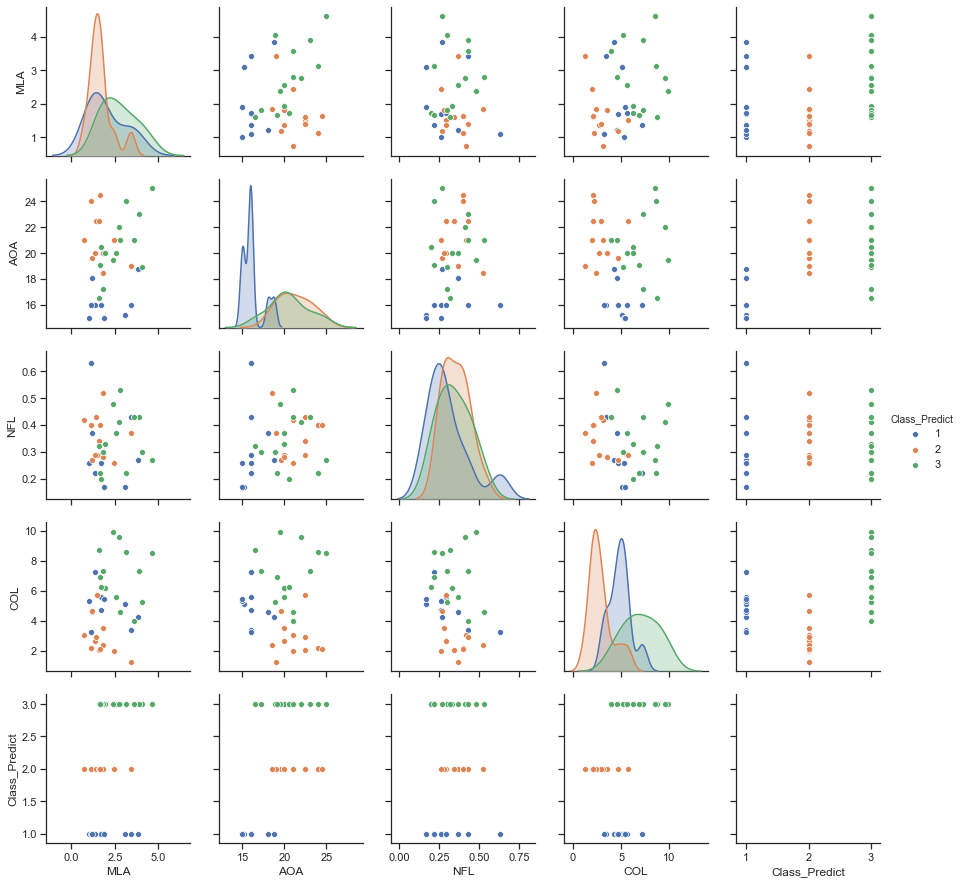

In [34]:
X_Result['Class_Predict'] = pred_elem
sns.pairplot(X_Result, hue="Class_Predict")

<ol>
    <li>MLA = Malic acid</li>
    <li>AOA = Alcalinity of ash</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>COL = Color intensity</li>
</ol>

In [35]:
X_Result['Actual'] = y_test

In [36]:
X_Result.head(10)

,MLA,AOA,NFL,COL,Class_Predict,Actual
19,3.10,15.2,0.17,5.10,1,1
45,4.04,18.9,0.30,5.24,3,1
140,2.81,21.0,0.53,4.60,3,3
30,1.50,22.5,0.29,5.70,2,1
67,1.17,19.6,0.27,4.68,2,2
16,1.92,20.0,0.33,6.20,3,1
119,3.43,19.0,0.37,1.28,2,2
174,3.91,23.0,0.43,7.30,3,3
109,1.35,20.0,0.29,2.65,2,2
141,2.56,20.0,0.37,5.60,3,3
